In [2]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import os
import numpy as np
# import collections

In [4]:
files = {
'901': '/Users/mbornhol/git/neural-profiling/training/runs/901/out.md',
'827': '/Users/mbornhol/git/neural-profiling/training/runs/827/827_out.md',
'811': '/Users/mbornhol/git/neural-profiling/training/runs/811/out_14256050.md',
'819': '/Users/mbornhol/git/neural-profiling/training/runs/819/819_out.md',
'806_2': '/Users/mbornhol/git/neural-profiling/training/runs/806_2/out.md',
'903':'/Users/mbornhol/git/neural-profiling/training/runs/903/out.md',
'902': '/Users/mbornhol/git/neural-profiling/training/runs/902/out.md',
'826_2': '/Users/mbornhol/git/neural-profiling/training/runs/826_2/out.md',
'813':'/Users/mbornhol/git/neural-profiling/training/runs/813/out.md',
'825':'/Users/mbornhol/git/neural-profiling/training/runs/825/out.md',
'822':'/Users/mbornhol/git/neural-profiling/training/runs/822/822_out.md',
'806_1':'/Users/mbornhol/git/neural-profiling/training/runs/806_1/out.md',
'831':'/Users/mbornhol/git/neural-profiling/training/runs/831/out.md',
'910' : '/Users/mbornhol/git/neural-profiling/training/runs/910/out.md',
'913' : '/Users/mbornhol/git/neural-profiling/training/runs/913/out.md',
'915' : '/Users/mbornhol/git/neural-profiling/training/runs/915/out.md',
'916' : '/Users/mbornhol/git/neural-profiling/training/runs/916/out.md',
'917' : '/Users/mbornhol/git/neural-profiling/training/runs/917/out.md',
'918' : '/Users/mbornhol/git/neural-profiling/training/runs/918/out.md',
'919' : '/Users/mbornhol/git/neural-profiling/training/runs/919/out.md',
'920' : '/Users/mbornhol/git/neural-profiling/training/runs/920/out.txt',
'921' : '/Users/mbornhol/git/neural-profiling/training/runs/921/out.txt',
'922' : '/Users/mbornhol/git/neural-profiling/training/runs/922/out.txt',
'923' : '/Users/mbornhol/git/neural-profiling/training/runs/923/out.txt',
'925' : '/Users/mbornhol/git/neural-profiling/training/runs/925/out.txt',
'926' : '/Users/mbornhol/git/neural-profiling/training/runs/926/out.txt',
'927' : '/Users/mbornhol/git/neural-profiling/training/runs/927/out.txt',
'928' : '/Users/mbornhol/git/neural-profiling/training/runs/928/out.txt',
'929' : '/Users/mbornhol/git/neural-profiling/training/runs/929/out.txt',
'930' : '/Users/mbornhol/git/neural-profiling/training/runs/930/out.txt',
'931' : '/Users/mbornhol/git/neural-profiling/training/runs/931/out.txt',
}
# files = collections.OrderedDict(sorted(files.items()))

In [5]:
for file in files:
    print(file)
    text_file = open(files[file], 'r')
    data = text_file.read()
    ls= [m.end() for m in re.finditer(' loss: ', data)]
    loss = [float(data[i: i + 6]) for i in ls]
    ls= [m.end() for m in re.finditer(' acc: ', data)]
    acc = [float(data[i: i + 6]) for i in ls]
    ls= [m.end() for m in re.finditer(' val_acc: ', data)]
    val_acc = [float(data[i: i + 6]) for i in ls]
    df = pd.DataFrame()
    df['loss'] = loss
    df['acc'] = acc
    df['val_acc'] = val_acc
    df.to_csv(f"accuracy/{file}.csv", index=False)

901
827
811
819
806_2
903
902
826_2
813
825
822
806_1
831
910
913
915
916
917
918
919
920
921
922
923
925
926
927
928
929
930
931


In [5]:
experiments = [
    '1007',
    '1008',
    '1009',
    '1010',
    '1011',
    '1012',
    '1013',
    '1014',
    '1016',
    '1018',
    '1019',
    '1020',
    '1021',
    '1022',
    '1023',
    '1024',
    '1025',
    '1026',
    '1027',
    '1028',
    '1029',
    '1101',
    '1102',
    '1103',
    '1104',
    '1105',
    '1107',
]
for e in experiments:
    print(e)
    file = f'/Users/mbornhol/git/neural-profiling/training/runs/{e}/out.txt'
    text_file = open(file, 'r')
    df = []
    for line in text_file:
        if 'val_loss' in line:
            i = line.find(' loss: ')
            loss = float(line[i + 7: i + 13])
            i = line.find(' acc: ')
            acc = float(line[i + 6: i + 13])
            i = line.find(' val_acc: ')
            val_acc = float(line[i + 10: i + 16])
            df.append([loss, acc, val_acc])

    df = pd.DataFrame(df, columns=['loss', 'acc', 'val_acc'])
    df.to_csv(f"accuracy/{e}.csv", index=False)

1007
1008
1009
1010
1011
1012
1013
1014
1016
1018
1019
1020
1021
1022
1023
1024
1025
1026
1027
1028
1029
1101
1102
1103
1104
1105
1107


In [67]:
df

,loss,acc,val_acc
0,5.5996,0.0640,0.1281
1,4.0763,0.1997,0.2245
2,3.2475,0.3035,0.2772
3,2.7134,0.3878,0.3508
4,2.3220,0.4565,0.2745
5,1.9494,0.5351,0.2339
6,1.7243,0.5868,0.3881
7,1.5594,0.6268,0.4229
8,1.4305,0.6598,0.4254
9,1.3165,0.6910,0.5405


In [ ]:
data = text_file.read()
ls= [m.end() for m in re.finditer(' loss: ', data)]

In [ ]:
plt.style.use({'figure.facecolor':'white'})
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(figsize=(12,8))
plt.title("Loss functions")
plt.ylabel('loss')
plt.xlabel('step')

for file in sorted(os.listdir('accuracy'))[:7]:
    loss = pd.read_csv(f'accuracy/{file}')['loss']
    label = file.split('.csv')[0]
    plt.plot(loss, label = label)
plt.legend(loc = 'upper right', shadow=True)
plt.show()
for file in sorted(os.listdir('accuracy'))[7:]:
    loss = pd.read_csv(f'accuracy/{file}')['loss']
    label = file.split('.csv')[0]
    plt.plot(loss, label = label)
plt.legend(loc = 'upper right', shadow=True)
plt.show()

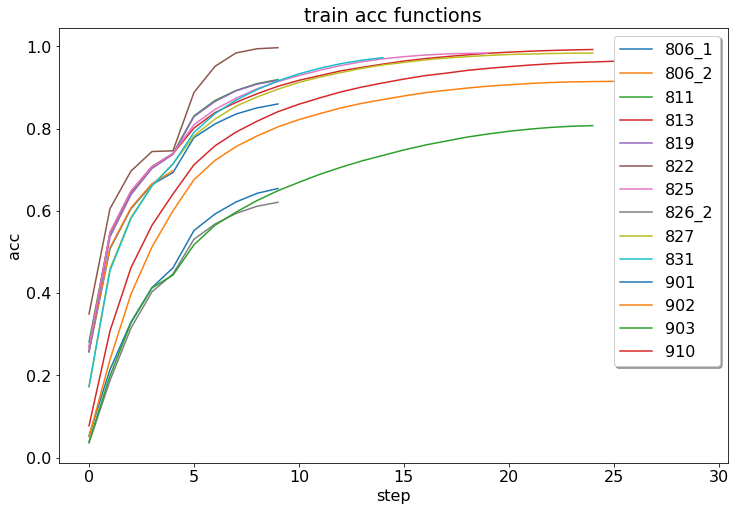

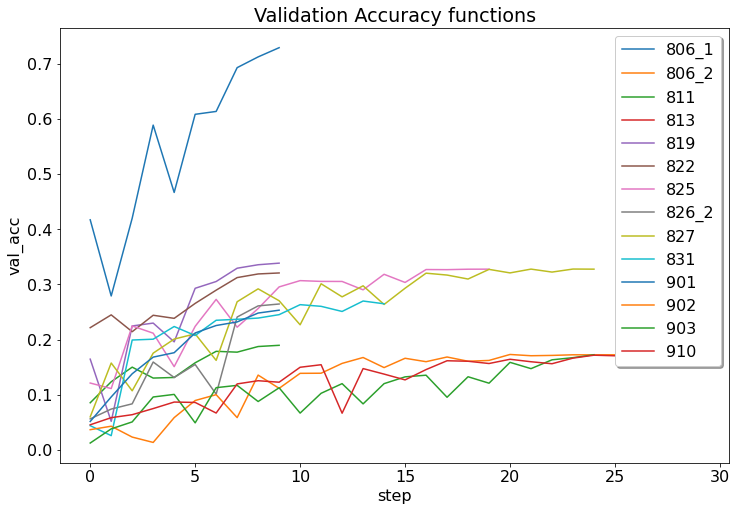

In [43]:
plt.style.use({'figure.facecolor':'white'})
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(figsize=(12,8))
plt.title("train acc functions")
plt.ylabel('acc')
plt.xlabel('step')

for file in sorted(os.listdir('accuracy')):
    loss = pd.read_csv(f'accuracy/{file}')['acc']
    label = file.split('.csv')[0]
    plt.plot(loss, label = label)
plt.legend(loc = 'upper right', shadow=True)
plt.show()

fig, ax = plt.subplots(figsize=(12,8))
plt.title("Validation Accuracy functions")
plt.ylabel('val_acc')
plt.xlabel('step')

for file in sorted(os.listdir('accuracy')):
    loss = pd.read_csv(f'accuracy/{file}')['val_acc']
    label = file.split('.csv')[0]
    plt.plot(loss, label = label)
plt.legend(loc = 'upper right', shadow=True)
plt.show()

In [98]:
sorted(os.listdir('accuracy'))

['806_1.csv',
 '806_2.csv',
 '811.csv',
 '813.csv',
 '819.csv',
 '822.csv',
 '825.csv',
 '826_2.csv',
 '827.csv',
 '901.csv',
 '902.csv',
 '903.csv']

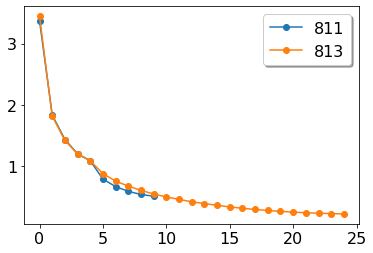

In [104]:
# same index. Same training. Shows consistency!
select = [
    '811.csv',
 '813.csv',
]
for file in select:
    loss = pd.read_csv(f'accuracy/{file}')['loss']
    label = file.split('.csv')[0]
    plt.plot(loss, label = label, linestyle='-', marker='o')
plt.legend(loc = 'upper right', shadow=True)
plt.show()

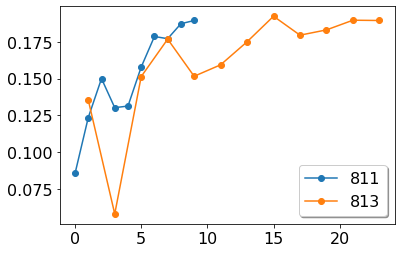

In [108]:
# val accuracy is more volatile
for file in select:
    loss = pd.read_csv(f'accuracy/{file}')['val_acc']
    mask = np.isfinite(loss)
    label = file.split('.csv')[0]
    plt.plot(loss[mask], label = label, linestyle='-', marker='o')
plt.legend(loc = 'lower right', shadow=True)

plt.show()

In [60]:
df['acc'] = acc

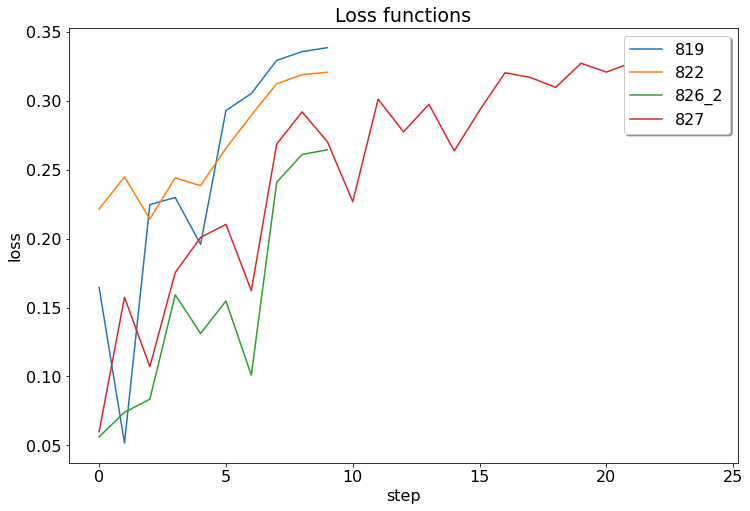

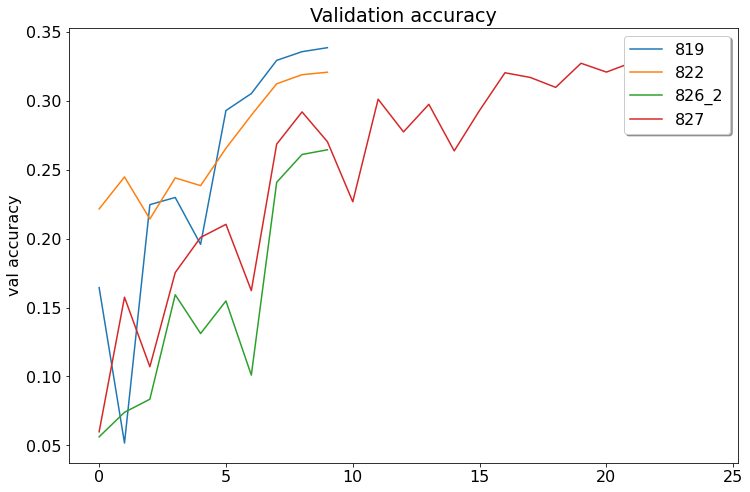

In [15]:
# plot each index
once = ['806_1', '813', '']
index817 = ['819.csv', '822.csv', '826_2.csv', '827.csv']


plt.style.use({'figure.facecolor':'white'})
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(figsize=(12,8))
plt.title("Loss functions")
plt.ylabel('loss')
plt.xlabel('step')

for file in sorted(os.listdir('accuracy')):
    if file in index817:
        loss = pd.read_csv(f'accuracy/{file}')['val_acc']
        label = file.split('.csv')[0]
        plt.plot(loss, label = label)
plt.legend(loc = 'upper right', shadow=True)
plt.show()

plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(figsize=(12,8))
plt.title("Validation accuracy")
plt.ylabel('val accuracy')
for file in sorted(os.listdir('accuracy')):
    if file in index817:
        loss = pd.read_csv(f'accuracy/{file}')['val_acc']
        label = file.split('.csv')[0]
        plt.plot(loss, label = label)
plt.legend(loc = 'upper right', shadow=True)
plt.show()

In [5]:
# Compare Val_acc to enrichment score...


TypeError: unhashable type: 'list'

In [28]:
top_acc = {}
for file in sorted(os.listdir('accuracy')):
    loss = pd.read_csv(f'accuracy/{file}')['val_acc']
    last = loss.iloc[-1]
    if np.isnan(last):
        last = loss.iloc[-2]
    label = file.split('.csv')[0]
    print(label, last)
    top_acc[file] = last

806_1 0.7293
806_2 0.4603
811 0.1896
813 0.1896
819 0.3386
822 0.3208
825 0.3277
826_2 0.2645
827 0.3277
831 0.2649
901 0.2533
902 0.1724
903 0.1725


In [36]:
# enri scores: 
scores = {
'806_1.csv' : 5.366608,
'806_2.csv': 0,
'811.csv': 12.580715,
'813.csv': 14.786610,
'819.csv': 12.950551,
'822.csv': 12.950551,
'825.csv': 8.688062,
'826_2.csv': 9.274154,
'827.csv': 13.269750,
'831.csv': 0,
'901.csv': 10.167251,
'902.csv': 10.519158,
'903.csv': 9.029053
}




dict_values([5.366608, 0, 12.580715, 14.78661, 12.950551, 12.950551, 8.688062, 9.274154, 13.26975, 0, 10.167251, 10.519158, 9.029053])

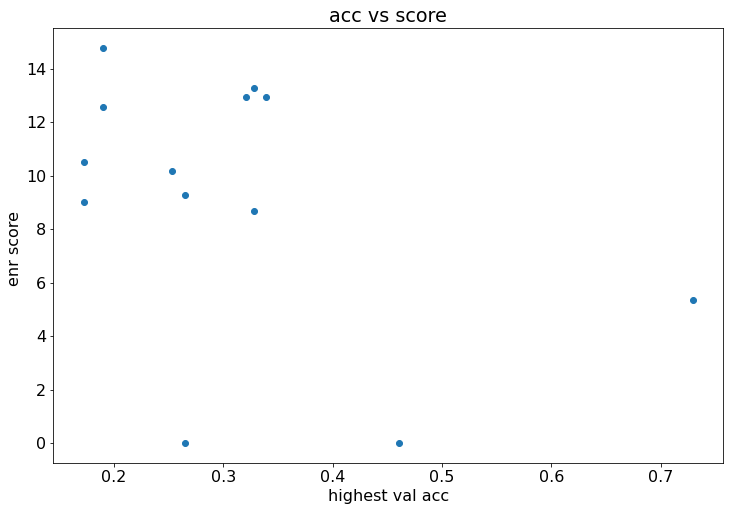

In [38]:
plt.style.use({'figure.facecolor':'white'})
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(figsize=(12,8))
plt.title("acc vs score")
plt.ylabel('enr score ')
plt.xlabel('highest val acc')

plt.scatter(top_acc.values(), scores.values())

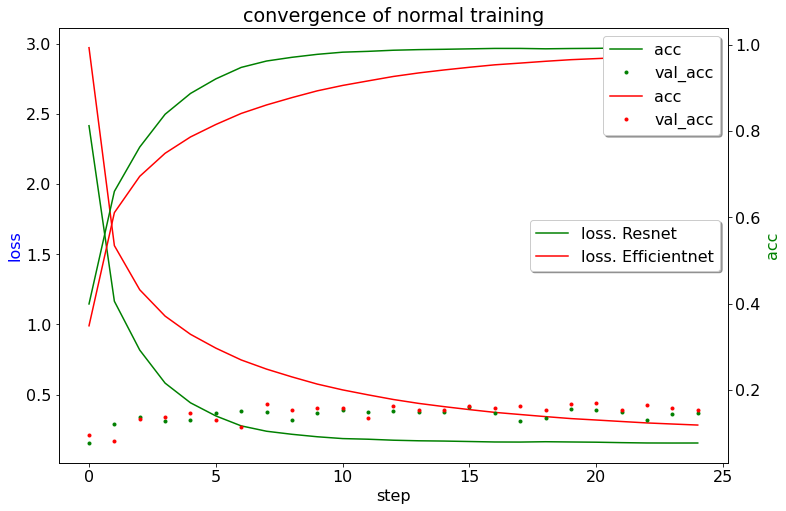

In [9]:
acc915 = pd.read_csv('accuracy/915.csv')
acc916 = pd.read_csv('accuracy/916.csv')

plt.style.use({'figure.facecolor':'white'})
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(figsize=(12,8))
plt.title("convergence of normal training")
plt.xlabel('step')

ax2 = ax.twinx()
ax.plot(acc915['loss'], 'g-', label = 'loss. Resnet')
ax2.plot(acc915['acc'], 'g-', label = 'acc' )
ax2.plot(acc915['val_acc'], 'g.', label = 'val_acc')

ax.plot(acc916['loss'], 'r-', label = 'loss. Efficientnet')
ax2.plot(acc916['acc'], 'r-', label = 'acc' )
ax2.plot(acc916['val_acc'], 'r.', label = 'val_acc')

ax.legend(loc = 'right', shadow=True)
ax2.legend(loc = 'upper right', shadow=True)
ax.set_ylabel('loss', color='b')
ax2.set_ylabel('acc', color='g')

plt.show()

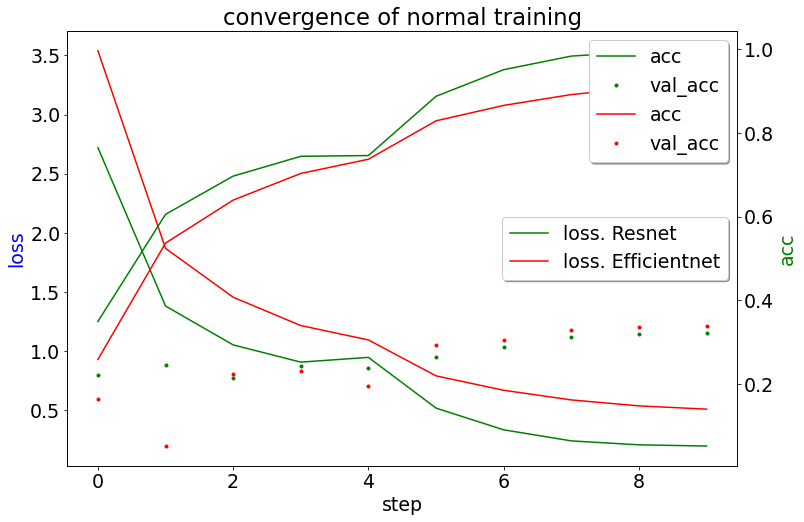

In [14]:
acc822 = pd.read_csv('accuracy/822.csv')
acc819 = pd.read_csv('accuracy/819.csv')

plt.style.use({'figure.facecolor':'white'})
plt.rcParams.update({'font.size': 19})
fig, ax = plt.subplots(figsize=(12,8))
plt.title("convergence of normal training")
plt.xlabel('step')

ax2 = ax.twinx()
ax.plot(acc822['loss'], 'g-', label = 'loss. Resnet')
ax2.plot(acc822['acc'], 'g-', label = 'acc' )
ax2.plot(acc822['val_acc'], 'g.', label = 'val_acc')

ax.plot(acc819['loss'], 'r-', label = 'loss. Efficientnet')
ax2.plot(acc819['acc'], 'r-', label = 'acc' )
ax2.plot(acc819['val_acc'], 'r.', label = 'val_acc')

ax.legend(loc = 'right', shadow=True)
ax2.legend(loc = 'upper right', shadow=True)
ax.set_ylabel('loss', color='b')
ax2.set_ylabel('acc', color='g')

plt.show()

In [7]:
for n in range(920, 931):
    print(f"'{n}' : /Users/mbornhol/git/neural-profiling/training/runs/{n}/out.txt'",)

'920' : /Users/mbornhol/git/neural-profiling/training/runs/920/out.txt'
'921' : /Users/mbornhol/git/neural-profiling/training/runs/921/out.txt'
'922' : /Users/mbornhol/git/neural-profiling/training/runs/922/out.txt'
'923' : /Users/mbornhol/git/neural-profiling/training/runs/923/out.txt'
'924' : /Users/mbornhol/git/neural-profiling/training/runs/924/out.txt'
'925' : /Users/mbornhol/git/neural-profiling/training/runs/925/out.txt'
'926' : /Users/mbornhol/git/neural-profiling/training/runs/926/out.txt'
'927' : /Users/mbornhol/git/neural-profiling/training/runs/927/out.txt'
'928' : /Users/mbornhol/git/neural-profiling/training/runs/928/out.txt'
'929' : /Users/mbornhol/git/neural-profiling/training/runs/929/out.txt'
'930' : /Users/mbornhol/git/neural-profiling/training/runs/930/out.txt'
